## Sub-Problem 2: Are there particular locations in Seattle where AirBnb listings fetch higher prices?

In [23]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
sb.set()

In [24]:
# Importing the listing dataset
listingsDF = pd.read_csv('listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### Data Cleaning

In [25]:
# Since this sub-problem focuses on the location of the listings, we will only extract
# varaiables that are related to its location.
listingDF = listingsDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]
listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [26]:
import pandas as pd

# Replace NaN values with 0 (make sure to work on a copy)
listingDF = listingDF.copy()
listingDF = listingDF.fillna(0)

# Convert 'price' column to float (removing $ and ,)
listingDF['price'] = listingDF['price'].apply(
    lambda x: float(str(x).replace('$','').replace(',',''))
)

# Remove invalid values (price, bedrooms, etc. must be > 0)
listingDF = listingDF[
    (listingDF['price'] > 0) &
    (listingDF['bedrooms'] > 0) &
    (listingDF['bathrooms'] > 0) &
    (listingDF['accommodates'] > 0) &
    (listingDF['beds'] > 0) &
    (listingDF['review_scores_rating'] > 0) &
    (listingDF['reviews_per_month'] > 0)
]

listingDF.head()


,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,0,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


### Analyzing neighbourhood with price of listing

<Axes: xlabel='property_type', ylabel='neighbourhood_cleansed'>

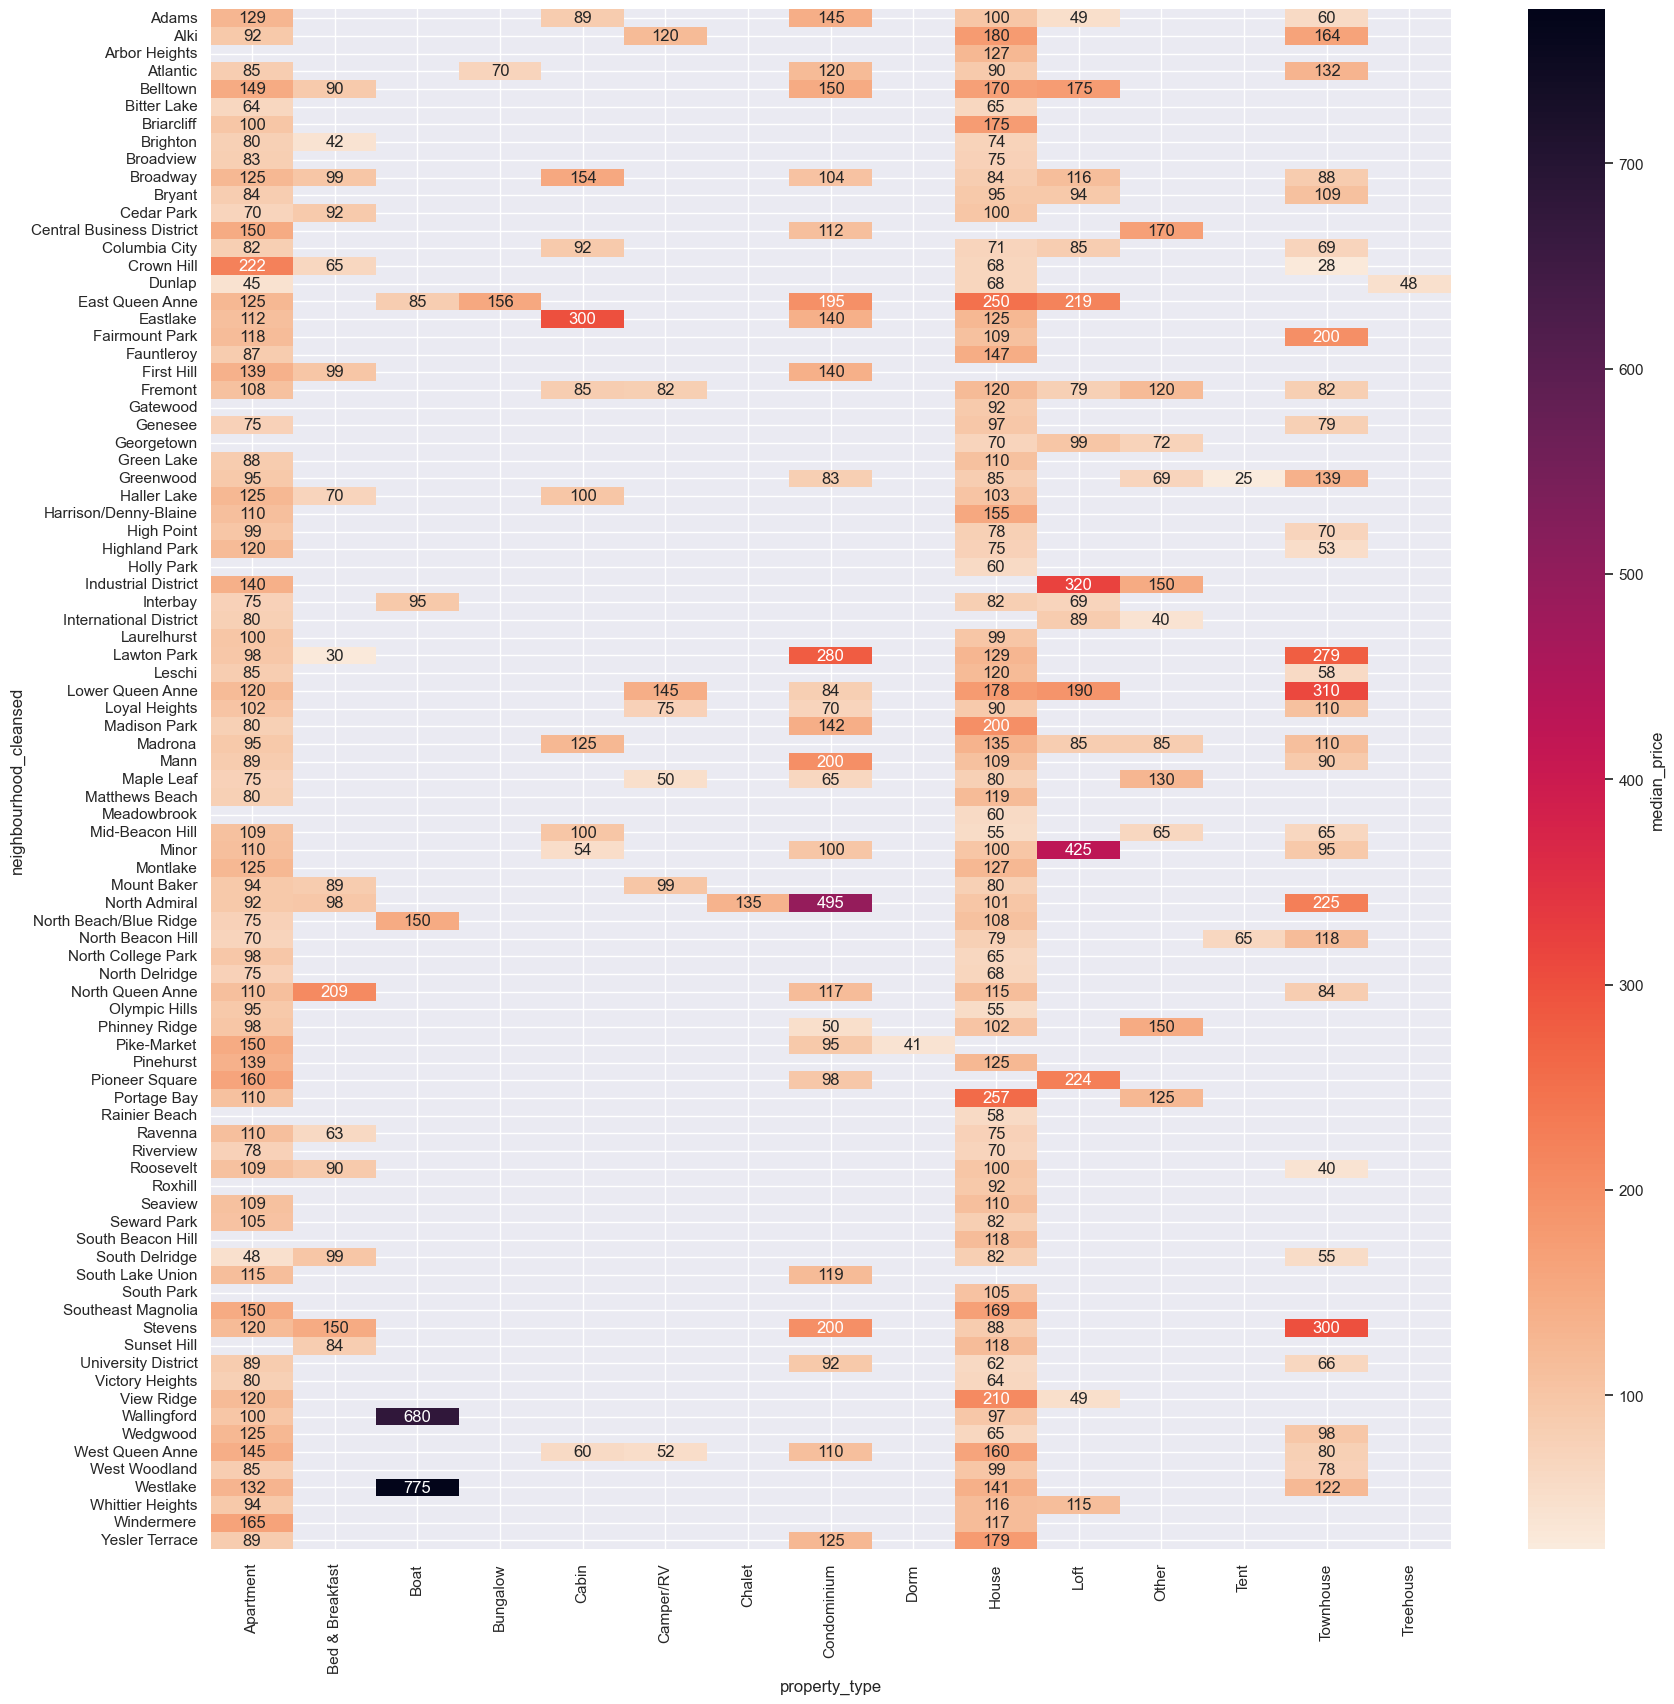

In [27]:
# Plotting a heatmap of the neighbourhoods vs property type with the median price

plt.figure(figsize=(20,20))
sb.heatmap(listingDF.groupby([
        'neighbourhood_cleansed', 'property_type']).price.median().unstack(),annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'median_price'})

A heatmap was plotted to give a short and quick intuition of whether location plays a part in price of the listing. From the heatmap above, we can infer 2 things. First is that the **majority of listing types (Apartments & Houses) are listed in almost all neighbourhoods**. The second thing we can infer is that there are **some neighbourhood rows which tend to be darker than other neighbourhood rows** in the heatmap above. This could possibly mean location might have some influence in the price. So, we will analyze this further.

### Analysing number of listings of each room type in the neighbourhoods

In [28]:
# Geographical Clusters to find out which area in Boston has maximum listings on Airbnb

# seggregating each type of property

home = listingDF[(listingDF.room_type == 'Entire home/apt')]
private = listingDF[(listingDF.room_type == 'Private room')]
shared = listingDF[(listingDF.room_type == 'Shared room')]

location_home = home[['latitude', 'longitude']]
location_private = private[['latitude', 'longitude']]
location_shared = shared[['latitude', 'longitude']]

In [29]:
print(location_home[['latitude','longitude']].head())
print(location_private[['latitude','longitude']].head())
print(location_shared[['latitude','longitude']].head())


    latitude   longitude
0  47.636289 -122.371025
1  47.639123 -122.365666
2  47.629724 -122.369483
4  47.632918 -122.372471
9  47.637492 -122.366889
     latitude   longitude
5   47.630525 -122.366174
6   47.636605 -122.368519
7   47.640161 -122.375856
8   47.632410 -122.357216
16  47.626200 -122.366602
      latitude   longitude
206  47.640177 -122.346523
308  47.668363 -122.338887
332  47.649708 -122.331015
333  47.650934 -122.331326
334  47.650973 -122.330884


In [30]:
!pip uninstall -y bokeh holoviews hvplot panel

Found existing installation: bokeh 2.4.3
Uninstalling bokeh-2.4.3:
  Successfully uninstalled bokeh-2.4.3
Found existing installation: holoviews 1.20.2
Uninstalling holoviews-1.20.2:
  Successfully uninstalled holoviews-1.20.2
Found existing installation: hvplot 0.11.3
Uninstalling hvplot-0.11.3:
  Successfully uninstalled hvplot-0.11.3
Found existing installation: panel 1.7.0
Uninstalling panel-1.7.0:
  Successfully uninstalled panel-1.7.0


In [32]:
!pip uninstall -y bokeh holoviews hvplot panel

In [34]:
# Install compatible versions
!pip install bokeh==3.6.0 holoviews==1.21.0 hvplot==0.13.1 panel==1.8.1


  Using cached bokeh-3.6.0-py3-none-any.whl.metadata (12 kB)
  Using cached holoviews-1.21.0-py3-none-any.whl.metadata (10 kB)


ERROR: Could not find a version that satisfies the requirement hvplot==0.13.1 (from versions: 0.1.1, 0.2.0, 0.2.1, 0.3.0, 0.4.0, 0.5.0, 0.5.1, 0.5.2, 0.6.0, 0.7.0, 0.7.1a2, 0.7.1a3, 0.7.1, 0.7.2a1, 0.7.2a3, 0.7.2rc1, 0.7.2rc2, 0.7.2rc3, 0.7.2rc4, 0.7.2rc5, 0.7.2, 0.7.3a1, 0.7.3a2, 0.7.3a3, 0.7.3rc1, 0.7.3rc2, 0.7.3rc3, 0.7.3rc4, 0.7.3, 0.8.0a1, 0.8.0a2, 0.8.0a3, 0.8.0a4, 0.8.0a5, 0.8.0a6, 0.8.0a7, 0.8.0a8, 0.8.0a9, 0.8.0a10, 0.8.0a17, 0.8.0a18, 0.8.0rc1, 0.8.0, 0.8.1a1, 0.8.1rc1, 0.8.1rc2, 0.8.1, 0.8.2a1, 0.8.2rc1, 0.8.2, 0.8.3rc1, 0.8.3rc2, 0.8.3, 0.8.4a1, 0.8.4, 0.8.5a1, 0.9.0a1, 0.9.0a2, 0.9.0rc2, 0.9.0, 0.9.1a1, 0.9.1rc1, 0.9.1, 0.9.2rc1, 0.9.2, 0.9.3a1, 0.9.3a2, 0.10.0rc1, 0.10.0rc2, 0.10.0, 0.11.0a1, 0.11.0a2, 0.11.0a3, 0.11.0rc1, 0.11.0rc2, 0.11.0, 0.11.1rc1, 0.11.1, 0.11.2a1, 0.11.2rc1, 0.11.2, 0.11.3rc1, 0.11.3, 0.12.0a1, 0.12.0rc1, 0.12.0, 0.12.1a1, 0.12.1)
ERROR: No matching distribution found for hvplot==0.13.1


In [36]:
import bokeh, holoviews, hvplot, panel

print("Bokeh:", bokeh.__version__)
print("Holoviews:", holoviews.__version__)
print("Hvplot:", hvplot.__version__)
print("Panel:", panel.__version__)


ModuleNotFoundError: No module named 'holoviews'

In [37]:
import sys
print(sys.executable)


C:\Users\kaush\anaconda3\python.exe


In [39]:
!pip install bokeh==3.6.0 holoviews==1.20.2 hvplot==0.12.1 panel==1.7.0


In [40]:
import bokeh, holoviews, hvplot, panel

print("Bokeh:", bokeh.__version__)
print("Holoviews:", holoviews.__version__)
print("Hvplot:", hvplot.__version__)
print("Panel:", panel.__version__)


Bokeh: 3.6.2
Holoviews: 1.20.2
Hvplot: 0.12.1
Panel: 1.7.0


In [41]:
import hvplot.pandas
import pandas as pd

# Sample data
df = pd.DataFrame({
    'x': range(10),
    'y': [i**2 for i in range(10)]
})

df.hvplot.line(x='x', y='y', title="Test Plot")


:Curve   [x]   (y)

In [42]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, OSM
from bokeh.models import ColumnDataSource, HoverTool
import numpy as np

output_notebook()

# --- Convert lat/lon to Web Mercator ---
def wgs84_to_web_mercator(df, lon="longitude", lat="latitude"):
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

# Apply conversion
location_home = wgs84_to_web_mercator(location_home.copy())
location_private = wgs84_to_web_mercator(location_private.copy())
location_shared = wgs84_to_web_mercator(location_shared.copy())

# Create ColumnDataSource with tooltips info
src_home = ColumnDataSource(location_home)
src_private = ColumnDataSource(location_private)
src_shared = ColumnDataSource(location_shared)

# --- Create plot ---
tile_provider = get_provider(OSM)

p = figure(
    x_range=(location_home["x"].min()-500, location_home["x"].max()+500),
    y_range=(location_home["y"].min()-500, location_home["y"].max()+500),
    x_axis_type="mercator", y_axis_type="mercator",
    width=900, height=600,
    title="Airbnb Listings in Seattle (OSM)",
    tools="pan,wheel_zoom,reset"
)

p.add_tile(tile_provider)

# Add hover tool
hover = HoverTool(tooltips=[
    ("Price", "@price"),
    ("Bedrooms", "@bedrooms"),
    ("Bathrooms", "@bathrooms"),
    ("Room Type", "@room_type"),
    ("Accommodates", "@accommodates")
])
p.add_tools(hover)

# Plot points
p.scatter(x="x", y="y", size=6, fill_color="yellow", line_color=None, alpha=0.8, source=src_home, legend_label="Home")
p.scatter(x="x", y="y", size=6, fill_color="red", line_color=None, alpha=0.8, source=src_private, legend_label="Private")
p.scatter(x="x", y="y", size=6, fill_color="blue", line_color=None, alpha=0.8, source=src_shared, legend_label="Shared")

p.legend.location = "top_right"

show(p)


Loading BokehJS ...

Yellow cirles represents entire house/apartments, red circles represent private rooms and blue circles represent shared rooms. From the points on the map above, we can see that most of the yellow cirles are concentrated in central Seattle. That is, most of the listings that list the entire house/apartment are concentrated in central Seattle and in particular neighbourhoods like 'Broadway', 'Belltown', 'Fremont', 'Pikepine Market', 'Queen Anne'.

### Finding the number of listings for each neighbourhood and median price

In [46]:
# --- Group neighbourhood by number of listings ---
neighbourhood_DF = home.groupby('neighbourhood_cleansed').id.count().reset_index()
neighbourhood_DF = neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF = neighbourhood_DF.sort_values('Number_Of_Listings', ascending=False)

# --- Group neighbourhood by median price ---
neighbourhoodPrice_DF = home.groupby('neighbourhood_cleansed').price.median().reset_index()
neighbourhoodPrice_DF = neighbourhoodPrice_DF.rename(columns={'price':'Median_Price'})
neighbourhoodPrice_DF = neighbourhoodPrice_DF.sort_values('Median_Price', ascending=False)

# --- Merge the two dataframes ---
mergeDF = pd.merge(neighbourhood_DF, neighbourhoodPrice_DF, on='neighbourhood_cleansed')
mergeDF.head()


,neighbourhood_cleansed,Number_Of_Listings,Median_Price
0,Broadway,166,142.0
1,Belltown,143,150.0
2,Wallingford,85,135.0
3,Fremont,83,138.0
4,Central Business District,72,149.5


Text(0, 0.5, 'Number_Of_Listings')

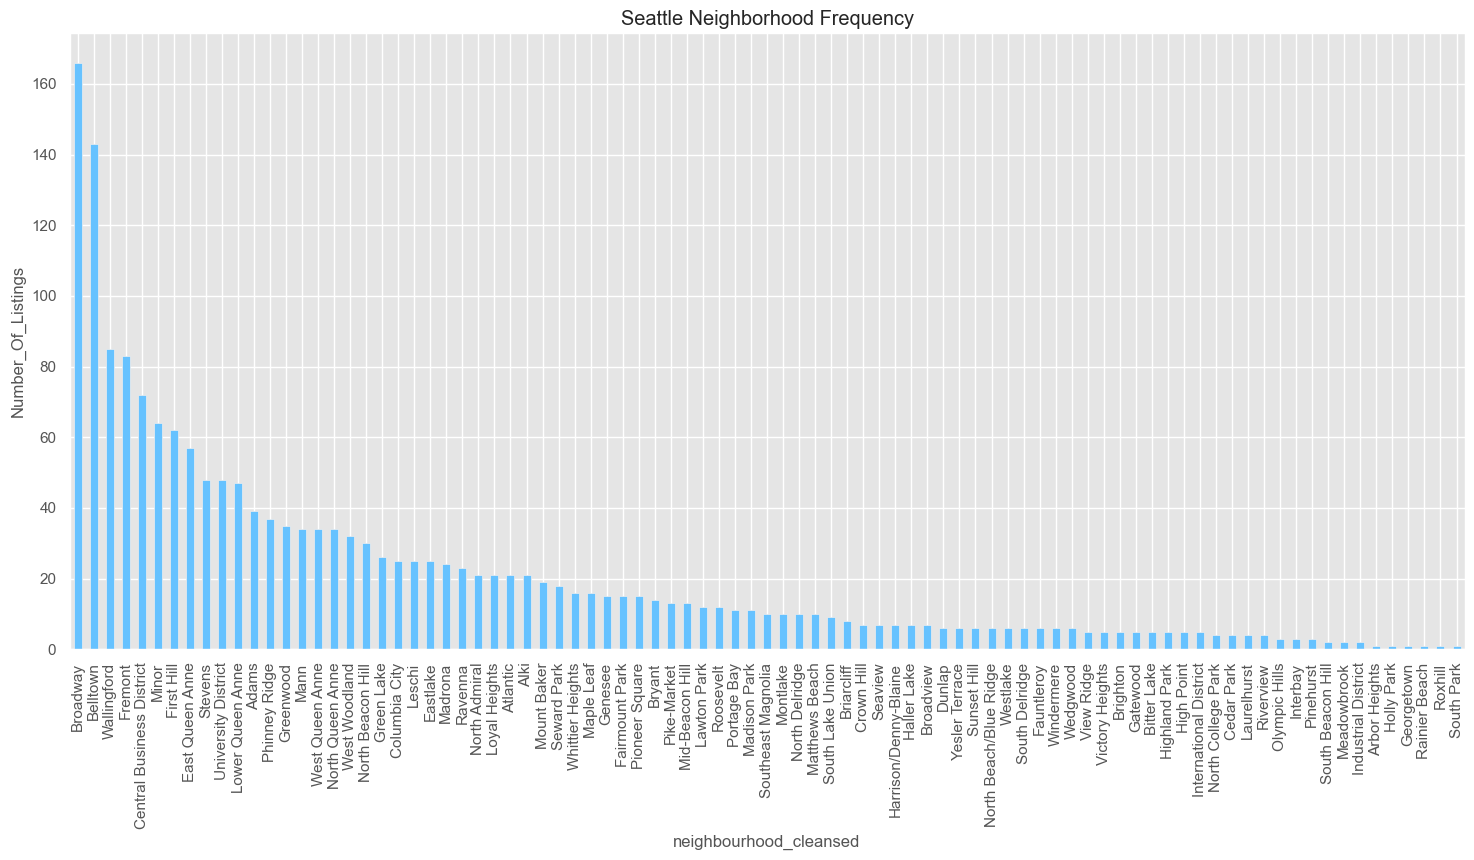

In [47]:
# Visualizing the number of listings for each neighbourhood
matplotlib.style.use('ggplot')

objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(18,8), 
           title = 'Seattle Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number_Of_Listings')

We can see that most of the listings appear in 'Broadway', 'Belltown', 'Fremont', 'East/North/West Queen Anne' etc. This gives us a good insight into the potential neighbourhoods where there are high number of listings. Our next step would be to analyze it with the price.

C:\Users\kaush\AppData\Local\Temp\ipykernel_19028\83186576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(y = "neighbourhood_cleansed", x = "price", data = listingDF, palette="Set2")


<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

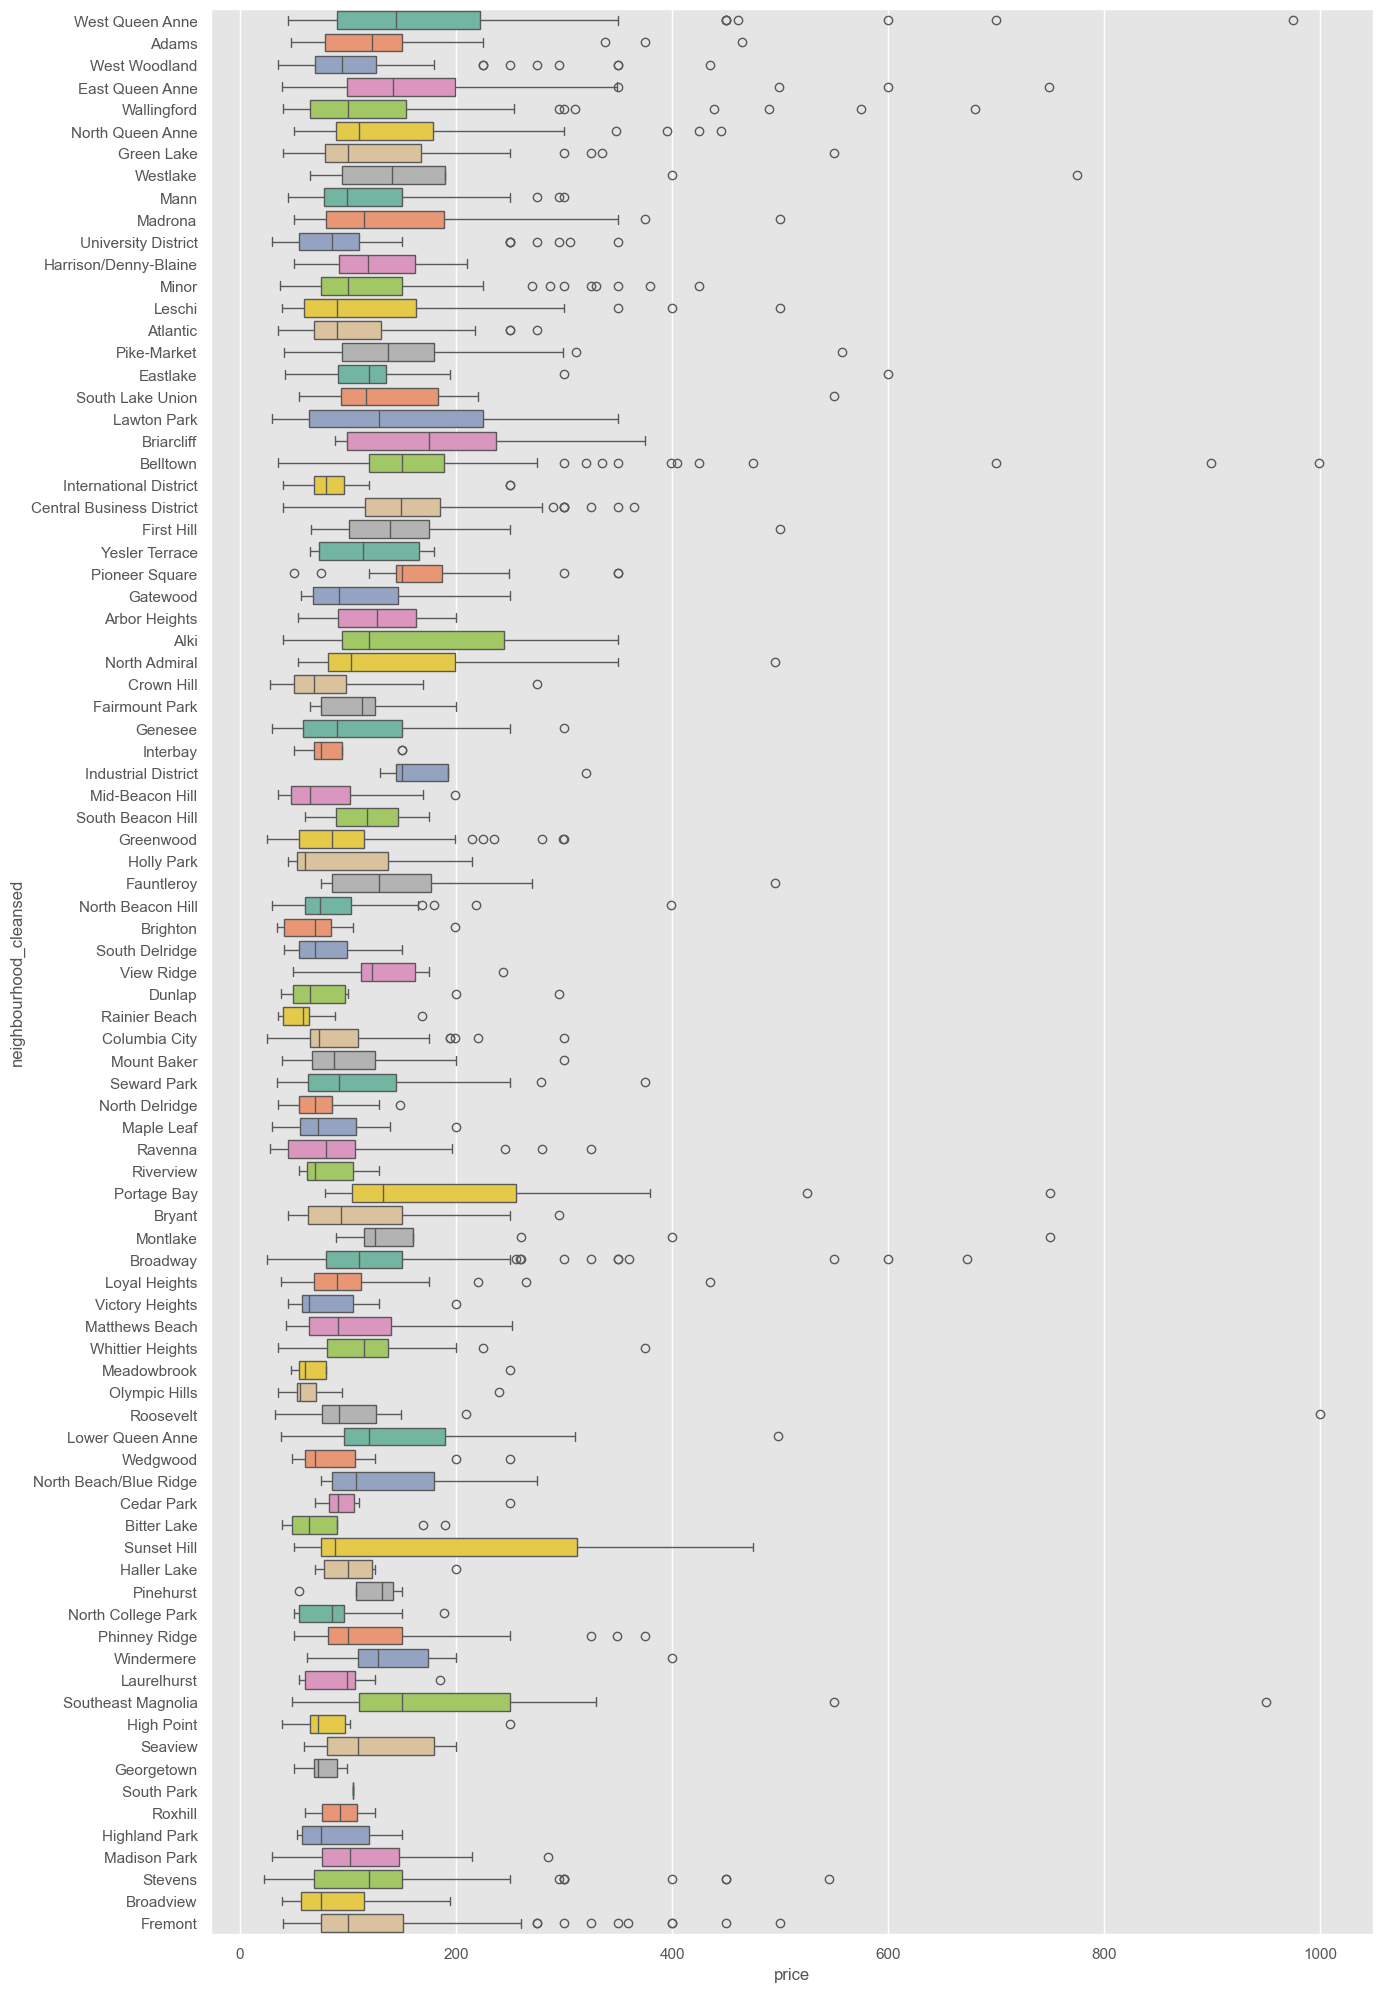

In [48]:
plt.figure(figsize = (15,25))
sb.boxplot(y = "neighbourhood_cleansed", x = "price", data = listingDF, palette="Set2")

Text(0, 0.5, 'Median Price')

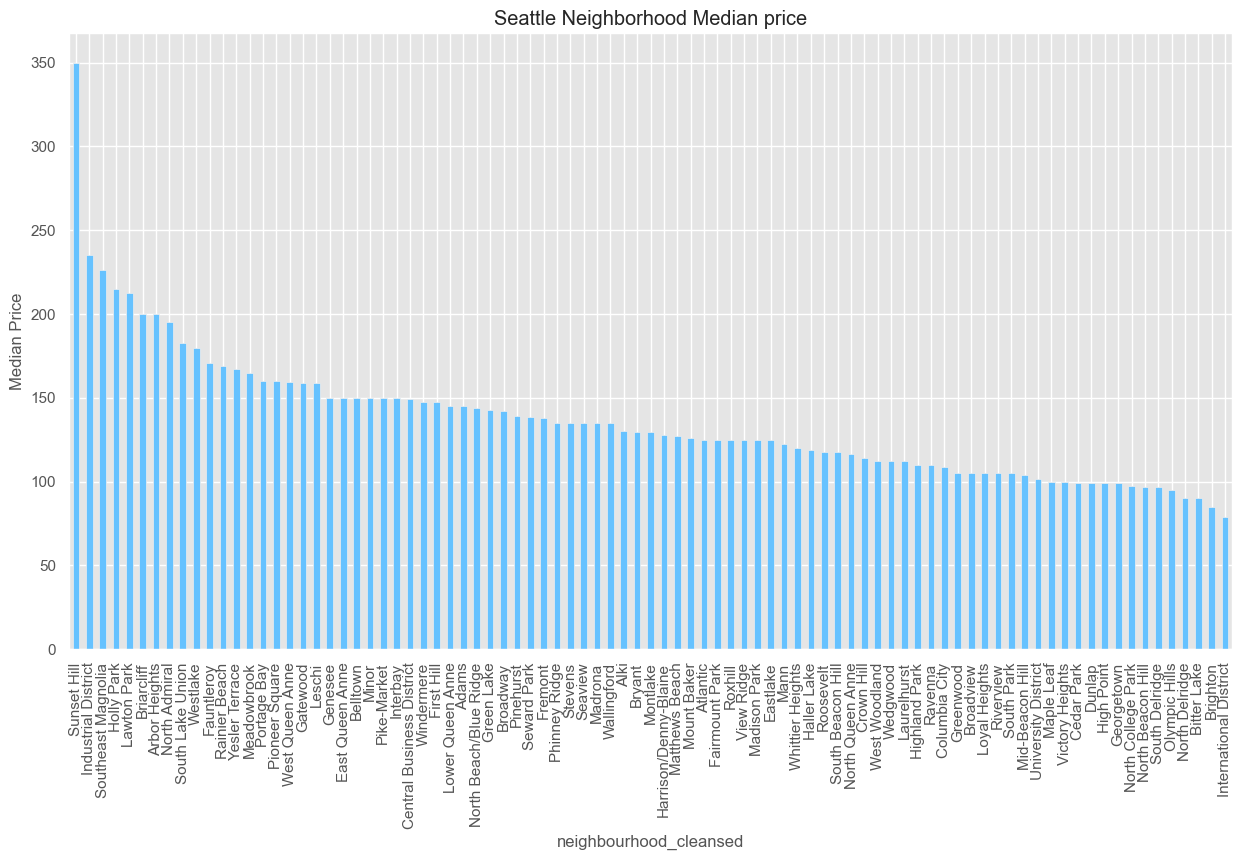

In [49]:
matplotlib.style.use('ggplot')

objects = neighbourhoodPrice_DF['neighbourhood_cleansed']
y_pos = neighbourhoodPrice_DF['Median_Price']

neighbourhoodPrice_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Median_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Seattle Neighborhood Median price', 
           legend = False)

plt.ylabel('Median Price')

By analyzing the number of listings and prices for each neighborhood, we can get a clearer understanding of which neighbourhoods have a lot of expensive listings. Looking at the analysis done so far, we can see that certain neighbourhoods are indeed more 'expensive' than others. However, some of those neighbourhoods do not have as many listings as other expensive neighbourhoods. Since our problem was to identify factors that make a listing more expensive, we can infer that these neighbourhoods tend to have more expensive listings. However, a more thorough inference would be to identify neighbourhoods that have both a higher number of listings and higher price as lower number of listings would mean fewer available listing for a customer to choose.

As such, neighbourhoods such as 'Belltown', 'West Queen Anne' are neighbourhoods that have a lot of expensive listings.